# **Import Library**

In [15]:
from re import search

from nltk.tag import sequential
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scrapping Dataset

In [16]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort

# Mengambil semua ulasan dari aplikasi dengan ID  di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview, _ = reviews(
    'id.go.imigrasi.paspor_online',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=10000             # Jumlah maksimum ulasan yang ingin diambil
)

# Loading Dataset

In [17]:
# Mengonversi hasil scraping ulasan menjadi DataFrame pandas untuk analisis lebih lanjut.
df = pd.DataFrame(scrapreview)

In [18]:
# Menyimpan DataFrame ke file CSV untuk penyimpanan dan analisis lebih lanjut.
df.to_csv('data/ulasan_aplikasi_imigrasi.csv', index=False)

In [19]:
# Memuat dataset dari file CSV
df = pd.read_csv('data/ulasan_aplikasi_imigrasi.csv')

In [20]:
# Menampilkan 5 baris pertama dari DataFrame untuk melihat struktur data
df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,286ecd99-60fc-42e4-9502-6873d2b5a363,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"meski ga 100% sempurna tanpa error sih, kadang...",4,0,7.1.3,2025-08-22 03:38:51,NaN,NaN,7.1.3
1,e7798282-701e-405f-9db5-08926039a920,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update kok diminta ulang login. Verifi...,2,12,7.1.3,2025-08-16 08:51:47,NaN,NaN,7.1.3
2,dcf0c650-cee7-4582-a9c0-b4594dc571e1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak heran sih. kalo app nya se engga intuitif ...,1,18,7.1.3,2025-08-17 23:36:55,NaN,NaN,7.1.3
3,422823d4-7700-41b8-83c3-6d1896dcf825,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,awalnya memang sulit untuk login atau mendafta...,5,6,7.2.0,2025-08-28 23:00:21,NaN,NaN,7.2.0
4,5a31b147-e47a-4363-820b-1423a92e73ea,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sudah hampir selesai proses pengisian dan uplo...,1,4,7.2.0,2025-08-29 11:29:23,NaN,NaN,7.2.0


In [21]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8682 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          5 non-null      object
 9   repliedAt             5 non-null      object
 10  appVersion            8682 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [22]:
# cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [23]:
#cek missing value
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1318
at                         0
replyContent            9995
repliedAt               9995
appVersion              1318
dtype: int64

In [24]:
# Menangani missing values

#drop kolom replyContent dan repliedAt
df = df.drop(columns=['replyContent', 'repliedAt'])

#mengisi missing value pada kolom reviewcreatedVersion dab appVersion dengan 'unknown'
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('unknown')
df['appVersion'] = df['appVersion'].fillna('unknown')

#print info dataset setelah penanganan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  10000 non-null  object
 7   at                    10000 non-null  object
 8   appVersion            10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


In [25]:
jumlah_ulasan_setelah_dihapus = df.shape[0]
jumlah_kolom_setelah_dihapus = df.shape[1]
print(f"Jumlah ulasan setelah penghapusan: {jumlah_ulasan_setelah_dihapus}")
print(f"Jumlah kolom setelah penghapusan: {jumlah_kolom_setelah_dihapus}")

Jumlah ulasan setelah penghapusan: 10000
Jumlah kolom setelah penghapusan: 9


# Preprocessing Data

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [32]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [27]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [28]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,286ecd99-60fc-42e4-9502-6873d2b5a363,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"meski ga 100% sempurna tanpa error sih, kadang...",4,0,7.1.3,2025-08-22 03:38:51,7.1.3
1,e7798282-701e-405f-9db5-08926039a920,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update kok diminta ulang login. Verifi...,2,12,7.1.3,2025-08-16 08:51:47,7.1.3
2,dcf0c650-cee7-4582-a9c0-b4594dc571e1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak heran sih. kalo app nya se engga intuitif ...,1,18,7.1.3,2025-08-17 23:36:55,7.1.3
3,422823d4-7700-41b8-83c3-6d1896dcf825,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,awalnya memang sulit untuk login atau mendafta...,5,6,7.2.0,2025-08-28 23:00:21,7.2.0
4,5a31b147-e47a-4363-820b-1423a92e73ea,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sudah hampir selesai proses pengisian dan uplo...,1,4,7.2.0,2025-08-29 11:29:23,7.2.0
...,...,...,...,...,...,...,...,...,...
9995,ce6f817e-22da-4399-a436-1c1a6b51ad72,titin sulis ferbuastuti,https://play-lh.googleusercontent.com/a-/ALV-U...,"Mau klik tanggal ga bisa loh , nyak nyuk ga bisa",1,0,5.4.7,2023-08-15 09:27:23,5.4.7
9996,610d9a14-75fa-4abb-a107-47e4aff317bb,Maria Ary Suryani,https://play-lh.googleusercontent.com/a-/ALV-U...,Pengalaman sy menggunakan aplikasi ini sangat ...,1,0,6.1.0,2023-12-28 17:28:39,6.1.0
9997,26cda28f-dca6-4d15-8e48-e06cc0412080,Yusa Rahman,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi suka nge blank,kayanya pada makan gaj...",1,0,unknown,2025-01-05 17:27:32,unknown
9998,c7e65678-6967-493d-a478-8dd348945ee5,Azka Channel,https://play-lh.googleusercontent.com/a-/ALV-U...,"Mau login force close terus, gimana dah ini ap...",1,0,6.2.4,2024-10-07 11:31:11,6.2.4


In [33]:
#membersihkan teks dan menyimpan hasilnya di kolom baru
df['cleaned_text'] = df['content'].apply(cleaningText)
#mengubah huruf kapital menjadi huruf kecil dan menyimpan hasilnya di kolom baru
df['text_casefold'] = df['cleaned_text'].apply(casefoldingText)
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefold'].apply(fix_slangwords)
# Memecah teks menjadi token dan menyimpannya di 'text_token'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
# Menghapus stopwords dan menyimpannya di 'text_nostopwords'
df['text_stopwords'] = df['text_tokenizingText'].apply(filteringText)
# stemming dan menyimpannya di 'text_stemming'
df['text_stemming'] = df['text_stopwords'].apply(stemmingText)
#menggabungkan kembali token menjadi teks dan menyimpannya di 'text_joined'
df['text_akhir'] = df['text_stopwords'].apply(toSentence)


In [34]:
df[['content', 'text_akhir']].head(10)

,content,text_akhir
0,"meski ga 100% sempurna tanpa error sih, kadang...",sempurna error kadang error ngulang mengisi x ...
1,Setelah update kok diminta ulang login. Verifi...,update ulang login verifikasi keamanannya susa...
2,gak heran sih. kalo app nya se engga intuitif ...,heran app engga intuitif ngerepotin pas bayar ...
3,awalnya memang sulit untuk login atau mendafta...,sulit login mendaftar gagal coba tanyatanya go...
4,sudah hampir selesai proses pengisian dan uplo...,selesai proses pengisian upload dokumen aplika...
5,"pembayaran nya susah,cuma punya mbanking BCA a...",pembayaran susahcuma mbanking bca ajasedangkan...
6,ini aplikasi gimana sih. mau daftar akun aja s...,aplikasi daftar akun susah time melulu tolongl...
7,"setelah update kenapa selalu gagal login, haru...",update gagal login kirim ulang otp email email...
8,"untuk login aja setengah mati, request timeout...",login mati request timeout melulu buruk update...
9,Bisa kirim otp nya nggak sih? belum selesai pe...,kirim otp selesai pendaftaran macet otp daftar...


# Pelabelan

In [35]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [43]:
#fungsi untuk pelabelan sentimen

def sentiment_analysis_lexicon_indonesia(text):
    words = text.split()
    positive_score = 0
    negative_score = 0

    for word in words:
        if word in lexicon_positive:
            positive_score += lexicon_positive[word]
        if word in lexicon_negative:
            negative_score += lexicon_negative[word]

    if positive_score > negative_score:
        return 'positive'
    elif negative_score > positive_score:
        return 'negative'
    else:
        return 'neutral'

In [48]:
result = df['text_stopwords'].apply(sentiment_analysis_lexicon_indonesia)
result = list(zip(*result))
df['polarity_score'] = result[0]
df['polarity'] = result[1]
print(df['polarity'].value_counts())

polarity
negative    7924
positive    1410
neutral      666
Name: count, dtype: int64


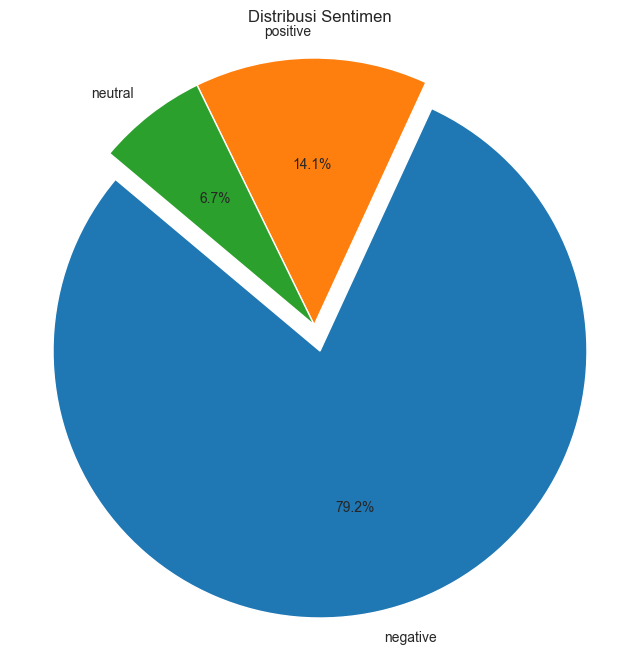

In [56]:
#visualisasi distribusi polaritas menggunakan pie chart
import matplotlib.pyplot as plt
sentiment_Counts = df['polarity'].value_counts()
labels = sentiment_Counts.index
explode = (0.1, 0, 0)

plt.figure (figsize=(8, 8))
plt.pie(sentiment_Counts, explode=explode, labels=labels, autopct='%1.1f%%',  startangle=140)
plt.title('Distribusi Sentimen')
plt.axis('equal')  # memastikan pie chart berbentuk lingkaran
plt.show()

In [68]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = df[df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopwords']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [69]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = df[df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopwords']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [70]:
#mengatur opsi tampilan pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)
# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas netral.
neutral_tweets = df[df['polarity'] == 'neutral']
# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopwords']]
# Mengurutkan DataFrame 'neutral_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)
# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_tweets = neutral_tweets[0:10]
# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)
# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

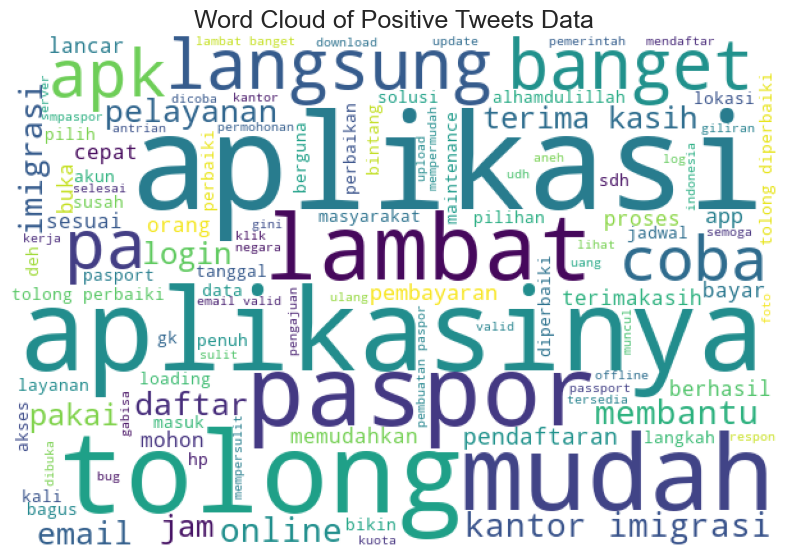

In [71]:
#membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''
# Iterasi melalui setiap tweet dalam kolom 'text_stopwords' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopwords']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))
# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
# Menonaktifkan grid pada sumbu.
ax.grid(False)
# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))
# Mengatur layout gambar.
fig.tight_layout(pad=0)
# Menyembunyikan sumbu.
ax.axis('off')
# Menampilkan word cloud.
plt.show()

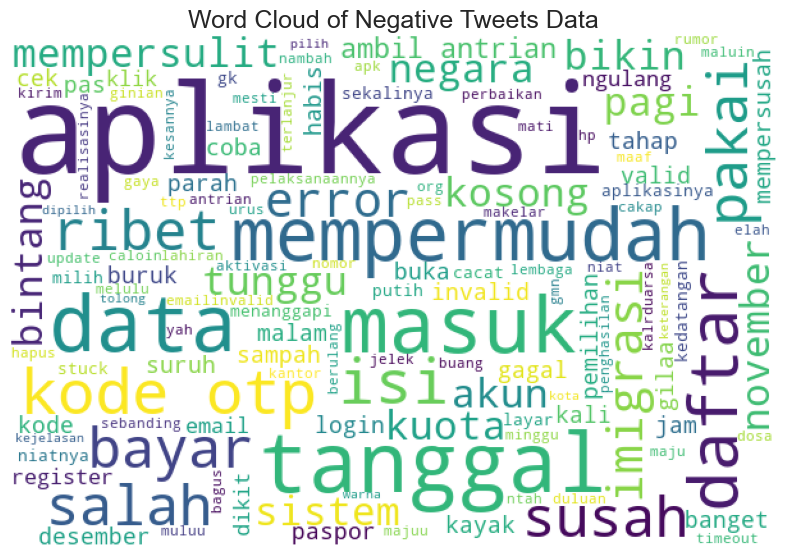

In [72]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopwords' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopwords']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

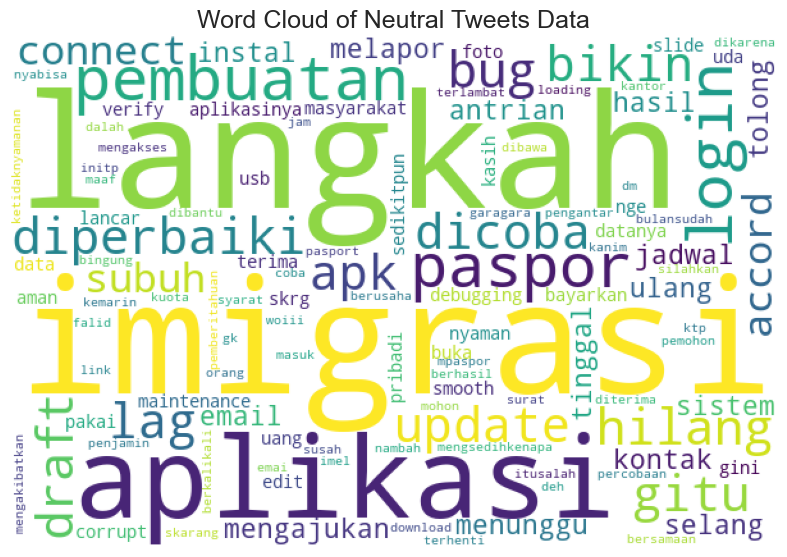

In [73]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet netral.
list_words = ''
# Iterasi melalui setiap tweet dalam kolom 'text_stopwords' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopwords']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)
# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))
# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
# Menonaktifkan grid pada sumbu.
ax.grid(False)
# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))
# Mengatur layout gambar.
fig.tight_layout(pad=0)
# Menyembunyikan sumbu.
ax.axis('off')
# Menampilkan word cloud.
plt.show()

# Ekstraksi Fitur menggunakan TF-IDF dan Bag of Words

In [110]:
X = df['text_akhir']
y = df['polarity']

In [111]:
#tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)
featurestfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [112]:
#bag of words vectorization
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(X)
featurebow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

In [113]:
#distribusi fitur teratas dari tf-idf
print("distribusi awal")
print(y.value_counts())

distribusi awal
polarity
negative    7924
positive    1410
neutral      666
Name: count, dtype: int64


In [114]:
#split data sebelum di resample smote

from sklearn.model_selection import train_test_split

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(featurestfidf_df, y, test_size=0.2, random_state=42)

X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(featurebow_df, y, test_size=0.3, random_state=42)


In [115]:
#menyeimbangkan dataset menggunakan Smote dengan data yang telah di split

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_tfidf_resampled, y_tfidf_resampled = smote.fit_resample(X_tfidf_train, y_tfidf_train)
X_bow_resampled, y_bow_resampled = smote.fit_resample(X_bow_train, y_bow_train)

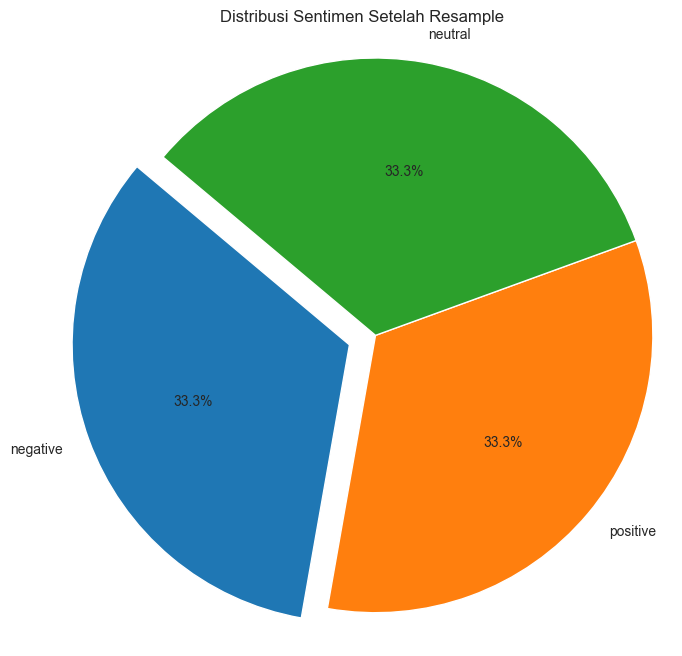

In [116]:
#visualisasi distribusi polaritas setelah di resample menggunakan pie chart
sentiment_Counts = y_tfidf_resampled.value_counts()
labels = sentiment_Counts.index
explode = (0.1, 0, 0)
plt.figure (figsize=(8, 8))
plt.pie(sentiment_Counts, explode=explode, labels=labels, autopct='%1.1f%%',  startangle=140)
plt.title('Distribusi Sentimen Setelah Resample')
plt.axis('equal')  # memastikan pie chart berbentuk lingkaran
plt.show()

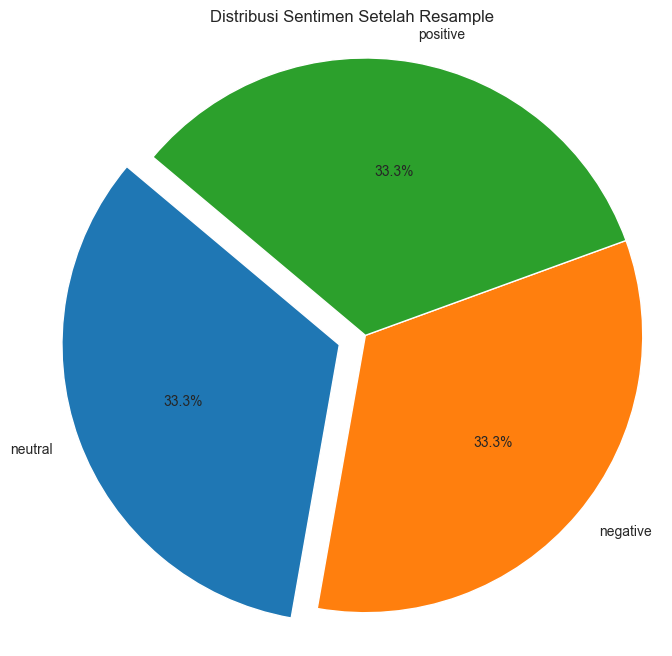

In [117]:
#visualisasi distribusi polaritas setelah di resample menggunakan pie chart
sentiment_Counts = y_bow_resampled.value_counts()
labels = sentiment_Counts.index
explode = (0.1, 0, 0)
plt.figure (figsize=(8, 8))
plt.pie(sentiment_Counts, explode=explode, labels=labels, autopct='%1.1f%%',  startangle=140)
plt.title('Distribusi Sentimen Setelah Resample')
plt.axis('equal')  # memastikan pie chart berbentuk lingkaran
plt.show()

# Permodelan

# Percobaan 1

In [121]:
# linear SVC dengan TF-IDF

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#membuat model Linear SVC
model_linear_svc_tfidf = LinearSVC()
#melatih model dengan data latih
model_linear_svc_tfidf.fit(X_tfidf_resampled, y_tfidf_resampled)
#memprediksi data latih dan data uji
y_tfidf_train_pred = model_linear_svc_tfidf.predict(X_tfidf_resampled)
y_tfidf_test_pred = model_linear_svc_tfidf.predict(X_tfidf_test)
#evaluasi akurasi model
accuracy_train = accuracy_score(y_tfidf_resampled, y_tfidf_train_pred)
accuracy_test = accuracy_score(y_tfidf_test, y_tfidf_test_pred)
#menampilkan hasil evaluasi
print("Linear SVC with TF-IDF")
print(f"Akurasi Data Latih: {accuracy_train:.4f}")
print(f"Akurasi Data Uji: {accuracy_test:.4f}")

Linear SVC with TF-IDF
Akurasi Data Latih: 0.9963
Akurasi Data Uji: 0.8740


# Percobaan 2

In [131]:
# model sequential dengan bag of words

from keras.models import Sequential
from keras.layers import Dense , Dropout
#membuat model sequential
model_sequential_bow = Sequential([
    Dense(128, activation='relu', input_shape=(X_bow_resampled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 kelas: positive, negative, neutral
])

#kompilasi model
model_sequential_bow.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#melatih model dengan data latih
model_sequential_bow.summary()

C:\Users\Acer\PycharmProjects\SubmisiProyekSentimenAnalisis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 128)            │     1,697,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,705,475 (6.51 MB)

 Trainable params: 1,705,475 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
history = model_sequential_bow.fit(X_bow_resampled, pd.get_dummies(y_bow_resampled), epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7934 - loss: 0.5400 - val_accuracy: 0.5101 - val_loss: 1.1578
Epoch 2/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9012 - loss: 0.2992 - val_accuracy: 0.5951 - val_loss: 1.0383
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9257 - loss: 0.2280 - val_accuracy: 0.5548 - val_loss: 1.0668
Epoch 4/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9384 - loss: 0.1913 - val_accuracy: 0.5831 - val_loss: 1.0191
Epoch 5/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9446 - loss: 0.1730 - val_accuracy: 0.5918 - val_loss: 1.0293
Epoch 6/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9504 - loss: 0.1582 - val_accuracy: 0.6179 - val_loss: 1.0171
Epoch 7/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9551 - loss: 0.1483 - val_accuracy: 0.6212 - val_loss: 1.0383
Epoch 8/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9571 - loss: 0.1409 - val_accu

In [133]:
# evaluasi model
loss, accuracy = model_sequential_bow.evaluate(X_bow_test, pd.get_dummies(y_bow_test))
print(f"Akurasi Data Uji: {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 1.2231
Akurasi Data Uji: 0.8630


# Percobaan 3

In [134]:
# Model sequential dengan TF-IDF

from keras.models import Sequential
from keras.layers import Dense , Dropout
#membuat model sequential
model_sequential_tfidf = Sequential([
    Dense(128, activation='relu', input_shape=(X_tfidf_resampled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas: positive, negative
])
#kompilasi model
model_sequential_tfidf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_sequential_tfidf.summary()

C:\Users\Acer\PycharmProjects\SubmisiProyekSentimenAnalisis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │     1,697,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,459 (6.51 MB)

 Trainable params: 1,707,459 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
history = model_sequential_tfidf.fit(X_tfidf_resampled, pd.get_dummies(y_tfidf_resampled), epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7969 - loss: 0.4989 - val_accuracy: 0.9184 - val_loss: 0.2562
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9738 - loss: 0.0895 - val_accuracy: 0.9950 - val_loss: 0.0337
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9916 - loss: 0.0281 - val_accuracy: 0.9992 - val_loss: 0.0056
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9966 - loss: 0.0128 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9974 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9997 - val_loss: 8.2979e-04
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9980 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 2.2995e-04
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9984 - loss: 0.0063 - 

In [136]:
# evaluasi model
loss, accuracy = model_sequential_tfidf.evaluate(X_tfidf_test, pd.get_dummies(y_tfidf_test))
print(f"Akurasi Data Uji: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8780 - loss: 1.1068
Akurasi Data Uji: 0.8780
